# Homework 2

In [20]:
# 算法的实现均在../lib文件夹内
import cv2
import numpy as np
from matplotlib import pyplot as plt
import importlib
import copy
import sys 
sys.path.append("..")

# reload module in case that module changes
from lib import utils
importlib.reload(utils)
from lib import image_process
importlib.reload(image_process)

<module 'lib.image_process' from '..\\lib\\image_process.py'>

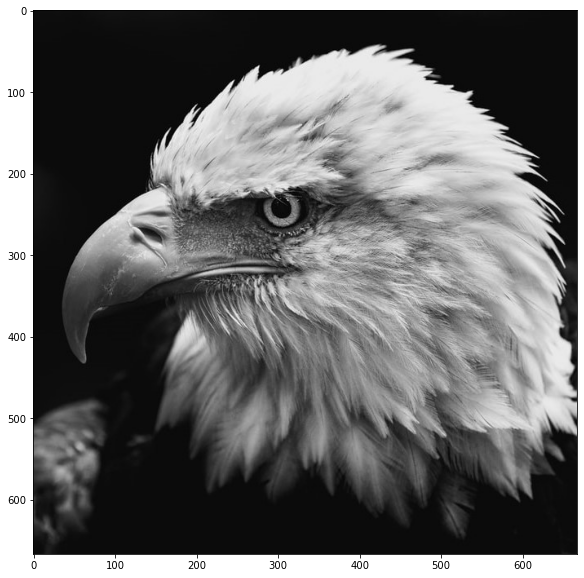

In [3]:
img = cv2.imread('img/example_02.jpg', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10,10))
utils.show_img(img)

# 1 图像变换

## 1.1 图像的参数化几何变换原理

齐次坐标：
$$
\mathbf{\overline{x}}=
\begin{bmatrix}
x\\
y\\
1
\end{bmatrix}
$$
平移变换：$\mathbf{x'}=\mathbf{x}+\mathbf{t}$
$$
\mathbf{x'}=
\begin{bmatrix}
\mathbf{I} & \mathbf{t}
\end{bmatrix}
\mathbf{\overline{x}}
$$
旋转+平移变换（欧氏变换）：$\mathbf{x'}=\mathbf{R}\mathbf{x}+\mathbf{t}$
$$
\mathbf{x'}=
\begin{bmatrix}
\mathbf{R} & \mathbf{t}
\end{bmatrix}
\mathbf{\overline{x}}
$$
$$
\mathbf{R}=
\begin{bmatrix}
\cos\theta & -\sin\theta\\
\sin\theta & \cos\theta\\
\end{bmatrix}
$$
相似变换：$\mathbf{x'}=s\mathbf{R}\mathbf{x}+\mathbf{t}$
$$
\mathbf{x'}=
\begin{bmatrix}
s\mathbf{R} & \mathbf{t}
\end{bmatrix}
\mathbf{\overline{x}}
=
\begin{bmatrix}
a & -b & t_x\\
b & a & t_y\\
\end{bmatrix}
\mathbf{\overline{x}}
$$
仿射变换：$\mathbf{x'}=\mathbf{A}\mathbf{\overline{x}}$，$\mathbf{A}$是某2×2的矩阵
$$
\mathbf{x'}=
\begin{bmatrix}
a_{00} & a_{01} & a_{02}\\
a_{10} & a_{11} & a_{12}\\
\end{bmatrix}
\mathbf{\overline{x}}
$$
透视变换：$\mathbf{x'}=\mathbf{H}\mathbf{\overline{x}}$，$\mathbf{H}$是某3×3的矩阵
$$
\mathbf{x'}=
\mathbf{H}\mathbf{\overline{x}}
$$

## 1.2 向前变换和逆向变换

向前变换：对于原图像$f(x)$的每个像素$x$：
$$
x'=h(x)
$$
$$
g(x')=f(x)
$$
向前变换存在的问题：

1. $x'$可能为非整数点，所以可能需要进行插值，会导致像素重叠或变化过于剧烈。
2. 变换后的图像可能有的像素点没有对应的值，导致空洞。

解决方案：逆向变换

对于原图像$g(x')$的每个像素$x'$：
$$
x=\hat{h}(x')
$$
$$
g(x')=f(x)
$$
当$x$不为整数时可以进行内插操作。

## 1.3 下抽样和内插

### 1.3.1 下抽样

Text(0.5, 1.0, 'Original Image')

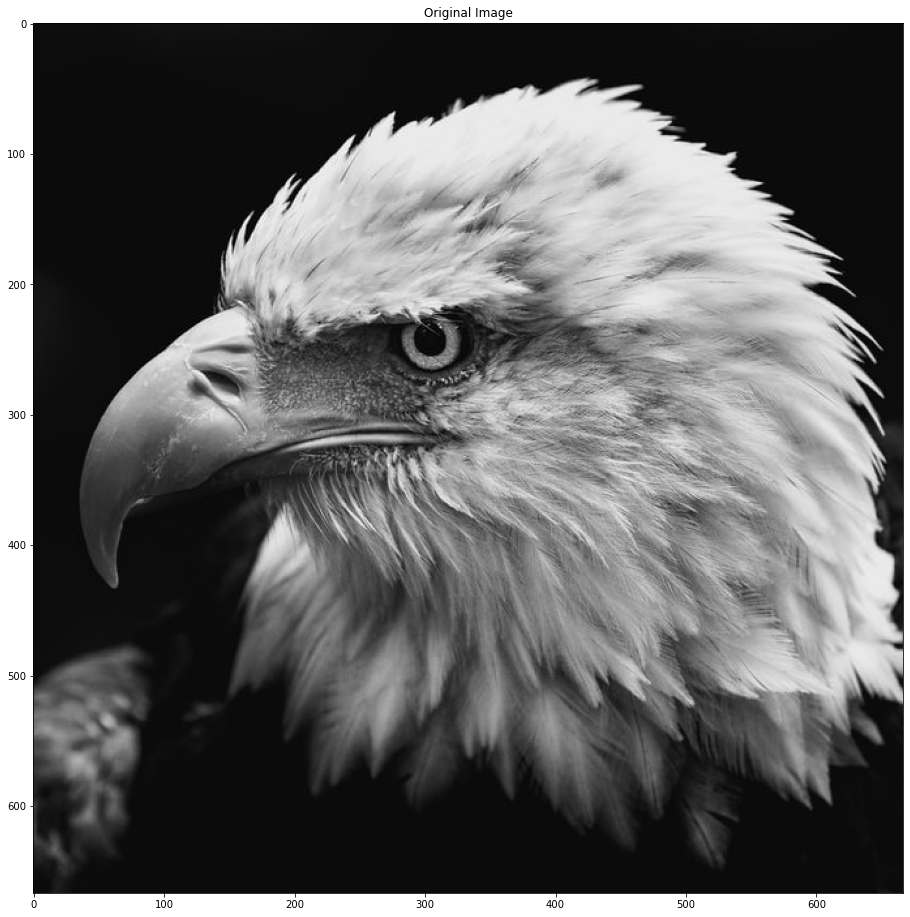

In [77]:
# 原图
img = cv2.imread('img/example_02.jpg', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(16,16))
utils.show_img(img)
plt.title('Original Image')

Text(0.5, 1.0, 'subsample factor=2*2 after filtered')

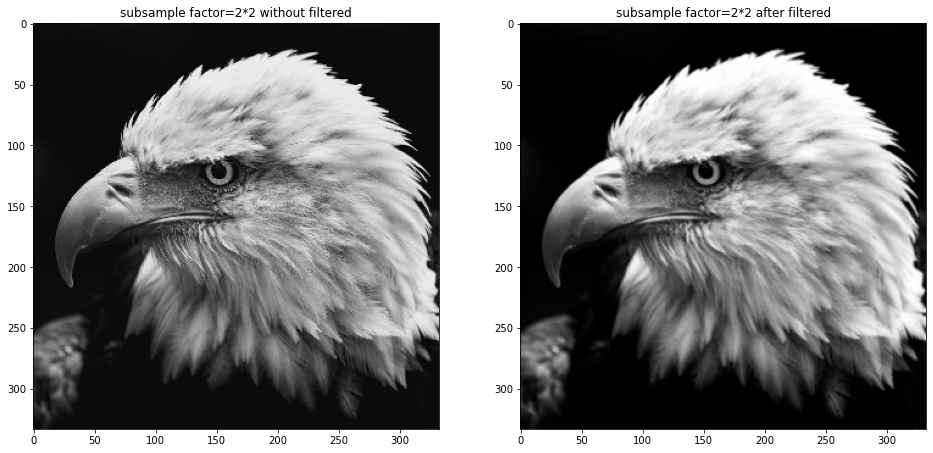

In [78]:
# 下抽样1次
plt.figure(figsize=(16, 32))
plt.subplot(121)
img_sub_2 = image_process.subsample(img)
utils.show_img(img_sub_2)
plt.title('subsample factor=2*2 without filtered')
plt.subplot(122)
img_sub_2_filtered = image_process.subsample_after_filtered(img)
utils.show_img(utils.normalize(img_sub_2_filtered))
plt.title('subsample factor=2*2 after filtered')

Text(0.5, 1.0, 'subsample factor=4*4 after filtered')

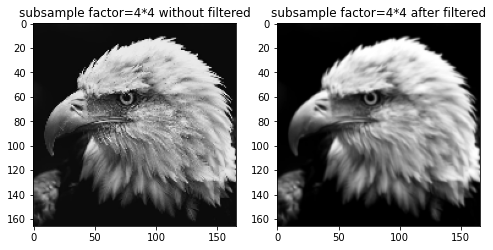

In [79]:
# 下抽样2次
plt.figure(figsize=(8, 16))
plt.subplot(121)
img_sub_4 = image_process.subsample(img_sub_2)
utils.show_img(img_sub_4)
plt.title('subsample factor=4*4 without filtered')
plt.subplot(122)
img_sub_4_filtered = image_process.subsample_after_filtered(img_sub_2_filtered)
utils.show_img(utils.normalize(img_sub_4_filtered))
plt.title('subsample factor=4*4 after filtered')

Text(0.5, 1.0, 'after filtered')

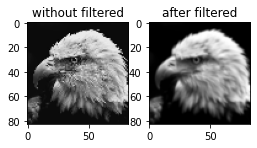

In [84]:
# 下抽样3次
plt.figure(figsize=(4, 8))
plt.subplot(121)
img_sub_8 = image_process.subsample(img_sub_4)
utils.show_img(img_sub_8)
plt.title('without filtered')
plt.subplot(122)
img_sub_8_filtered = image_process.subsample_after_filtered(img_sub_4_filtered)
utils.show_img(utils.normalize(img_sub_8_filtered))
plt.title('after filtered')

### 1.3.2 内插

Text(0.5, 1.0, 'upsample factor=4*4 Nearest neighbor interpolation')

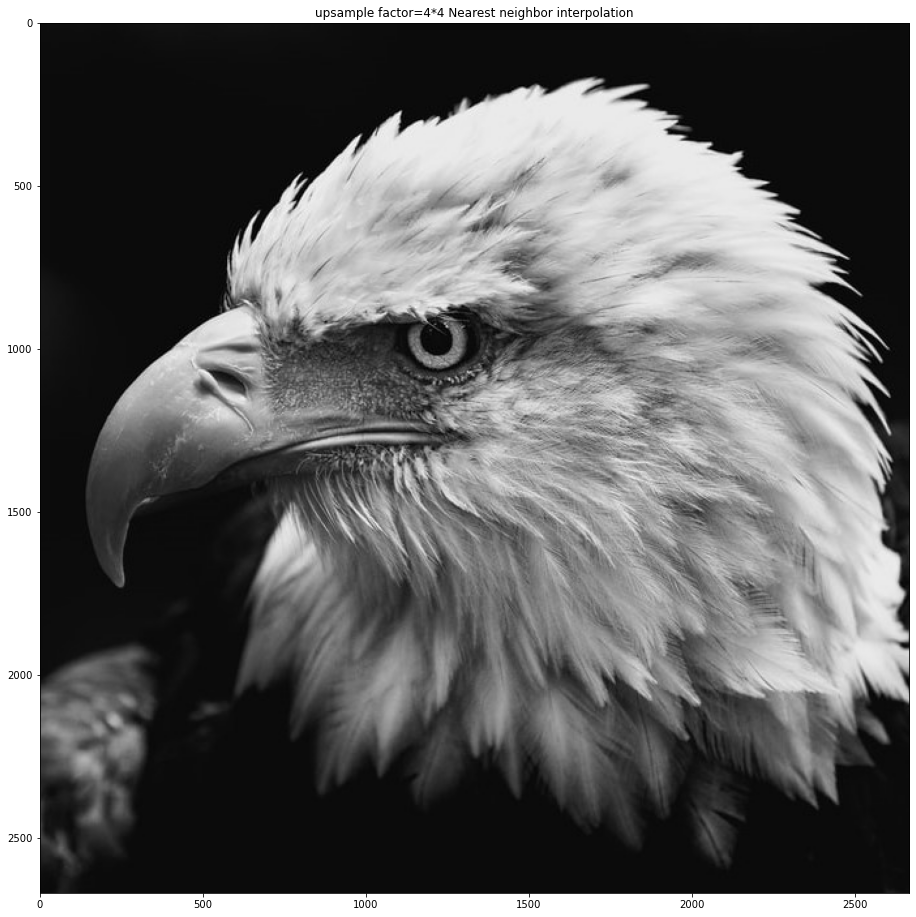

In [45]:
# 放大4倍，最近邻插值
plt.figure(figsize=(16, 16))
img_up_4_nearest = image_process.upsample_with_interpolation(img, 4, 'nearest')
utils.show_img(img_up_4_nearest)
plt.title('upsample factor=4*4 Nearest neighbor interpolation')

Text(0.5, 1.0, 'upsample factor=4*4 Bilinear interpolation')

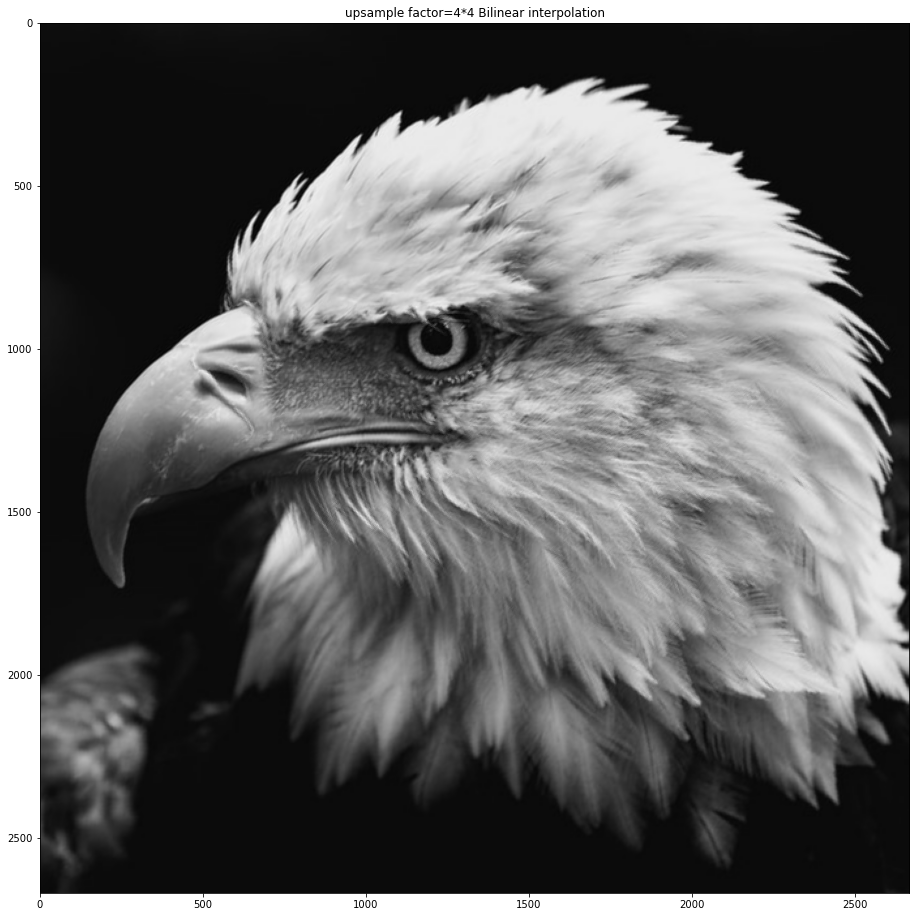

In [46]:
# 放大4倍，双线性插值
plt.figure(figsize=(16, 16))
img_up_4_nearest = image_process.upsample_with_interpolation(img, 4, 'bilinear')
utils.show_img(img_up_4_nearest)
plt.title('upsample factor=4*4 Bilinear interpolation')

## 1.4 几何变换实验

Text(0.5, 1.0, 'Translation Transform')

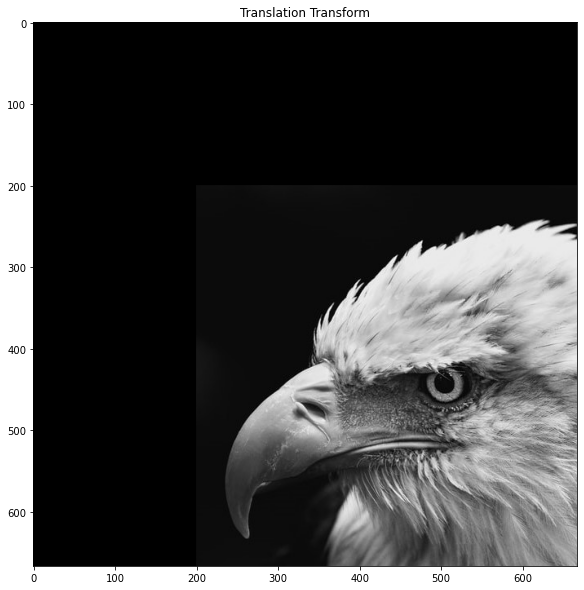

In [17]:
# 平移变换
kernel = image_process.get_translation_kernel(200, 200)
img_transformed = image_process.inverse_warping(img, kernel)
plt.figure(figsize=(10,10))
utils.show_img(img_transformed)
plt.title('Translation Transform')

Text(0.5, 1.0, 'Rotation Transform')

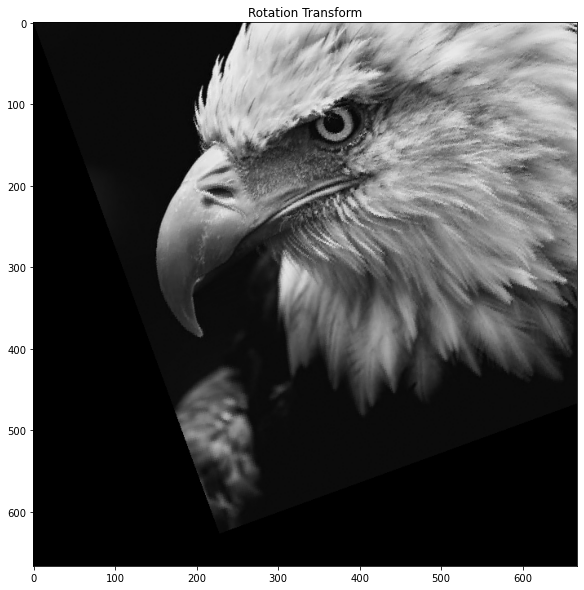

In [18]:
# 旋转变换
kernel = image_process.get_rotation_kernel(20)
img_transformed = image_process.inverse_warping(img, kernel)
plt.figure(figsize=(10,10))
utils.show_img(img_transformed)
plt.title('Rotation Transform')

Text(0.5, 1.0, 'Euclidean Transform')

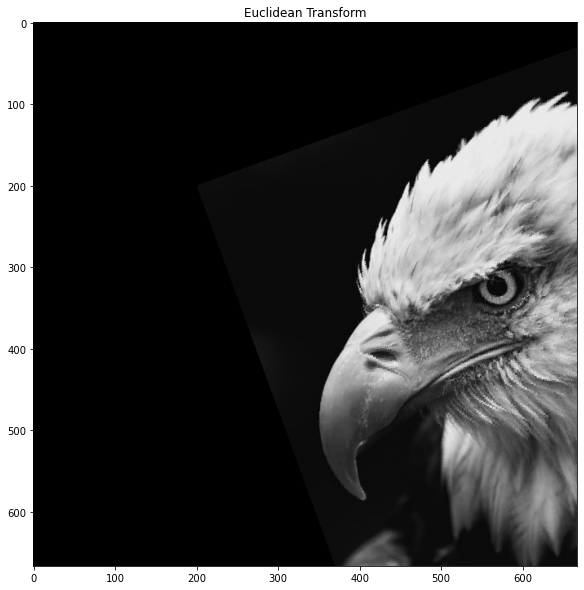

In [19]:
# 欧氏变换
kernel = image_process.get_euclidean_kernel(200, 200, 20)
img_transformed = image_process.inverse_warping(img, kernel)
plt.figure(figsize=(10,10))
utils.show_img(img_transformed)
plt.title('Euclidean Transform')

Text(0.5, 1.0, 'Similarity Transform')

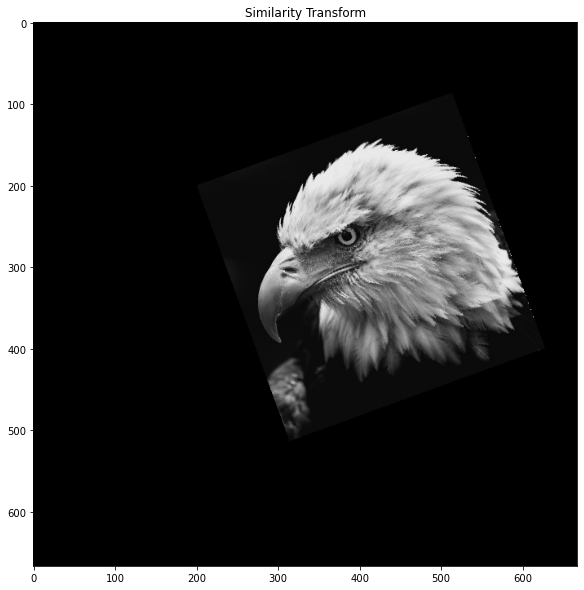

In [21]:
# 相似变换
kernel = image_process.get_similarity_kernel(200, 200, 20, 0.5)
img_transformed = image_process.inverse_warping(img, kernel)
plt.figure(figsize=(10,10))
utils.show_img(img_transformed)
plt.title('Similarity Transform')

Text(0.5, 1.0, 'Affine Transform')

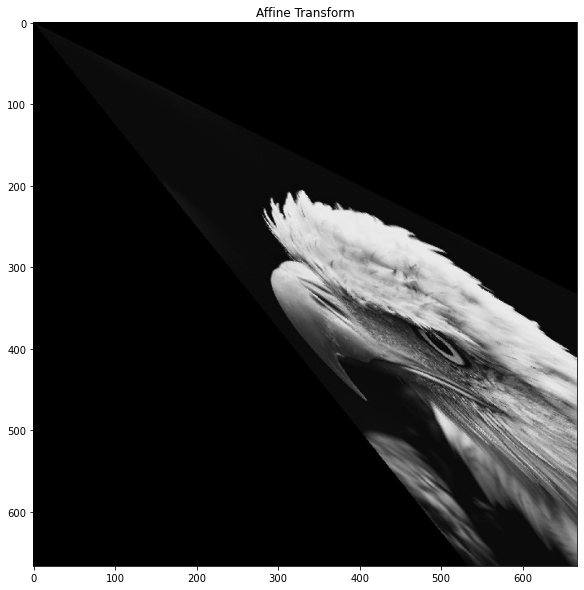

In [36]:
# 仿射变换
kernel = np.array([[1,0.5,0],
                  [0.8,1,0],
                  [0,0,1]])
img_transformed = image_process.inverse_warping(img, kernel)
plt.figure(figsize=(10,10))
utils.show_img(img_transformed)
plt.title('Affine Transform')

Text(0.5, 1.0, 'Projective Transform')

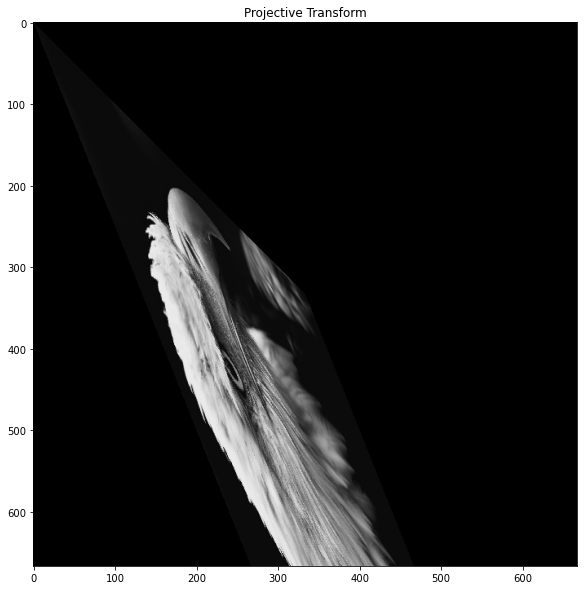

In [39]:
# 透视变换
kernel = np.array([[0.5,1,0],
                  [0.5,0.4,0],
                  [1,1,2]])
img_transformed = image_process.inverse_warping(img, kernel)
plt.figure(figsize=(10,10))
utils.show_img(img_transformed)
plt.title('Projective Transform')

## 1.5 高斯金字塔和拉普拉斯金字塔

### 1.5.1 高斯金字塔
见1.3.1

### 1.5.2 拉普拉斯金字塔

Text(0.5, 1.0, 'img-PyrUp(PyrDown(img)) level-0')

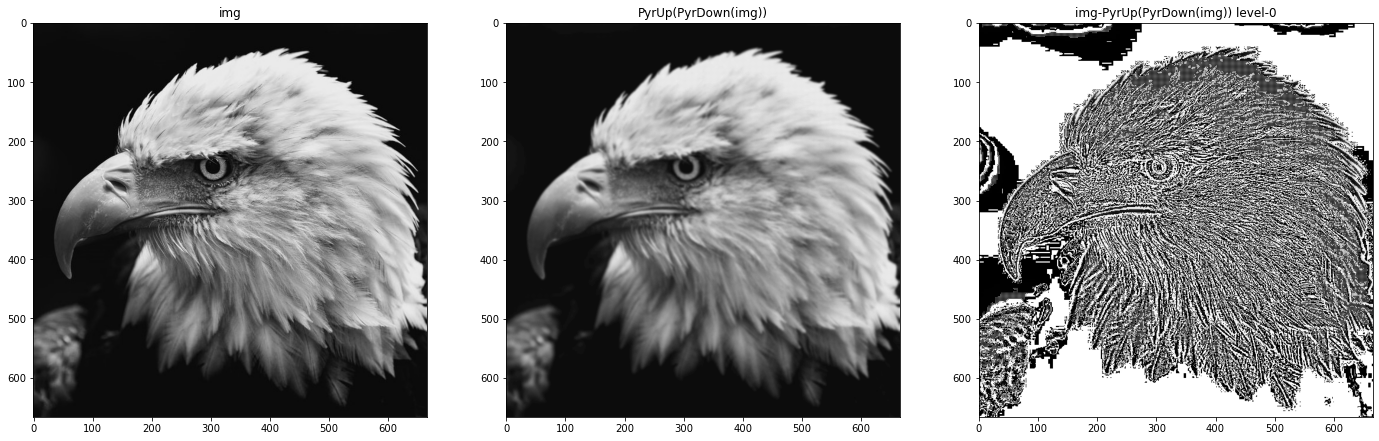

In [81]:
img_downup = image_process.upsample_then_filtered(img_sub_2_filtered)
plt.figure(figsize=(24, 8))
plt.subplot(131)
utils.show_img(utils.normalize(img))
plt.title('img')
plt.subplot(132)
utils.show_img(img_downup)
plt.title('PyrUp(PyrDown(img))')
plt.subplot(133)
utils.show_img(img[0:img_downup.shape[0],0:img_downup.shape[1]]-img_downup)
plt.title('img-PyrUp(PyrDown(img)) level-0')

Text(0.5, 1.0, 'img-PyrUp(PyrDown(img)) level-1')

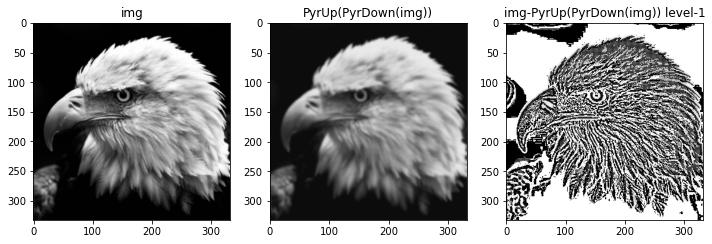

In [82]:
img_downup = image_process.upsample_then_filtered(img_sub_4_filtered)
plt.figure(figsize=(12, 4))
plt.subplot(131)
utils.show_img(utils.normalize(img_sub_2_filtered))
plt.title('img')
plt.subplot(132)
utils.show_img(img_downup)
plt.title('PyrUp(PyrDown(img))')
plt.subplot(133)
utils.show_img(img_sub_2_filtered[0:img_downup.shape[0],0:img_downup.shape[1]]-img_downup)
plt.title('img-PyrUp(PyrDown(img)) level-1')

Text(0.5, 1.0, 'level-2')

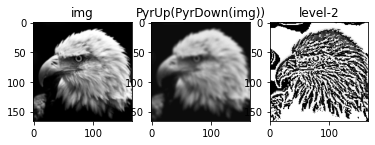

In [87]:
img_downup = image_process.upsample_then_filtered(img_sub_8_filtered)
plt.figure(figsize=(6, 2))
plt.subplot(131)
utils.show_img(utils.normalize(img_sub_4_filtered))
plt.title('img')
plt.subplot(132)
utils.show_img(img_downup)
plt.title('PyrUp(PyrDown(img))')
plt.subplot(133)
utils.show_img(img_sub_4_filtered[0:img_downup.shape[0],0:img_downup.shape[1]]-img_downup)
plt.title('level-2')

### 1.5.3 低通滤波和采样频率

$$
k_{max}<-k_{max}+\frac{N}{P}
$$

$$
k_{max}<\frac{N}{2P}
$$

$$
\frac{2k_{max}}{N}<\frac{1}{P}
$$

$$
2v_{max}<v_{sample}
$$
因此，低通滤波的截止频率应小于采样频率的一半。

# 2 特征检测

## 2.1 基于高斯微分的梯度

Text(0.5, 1.0, 'Gradient Orientation')

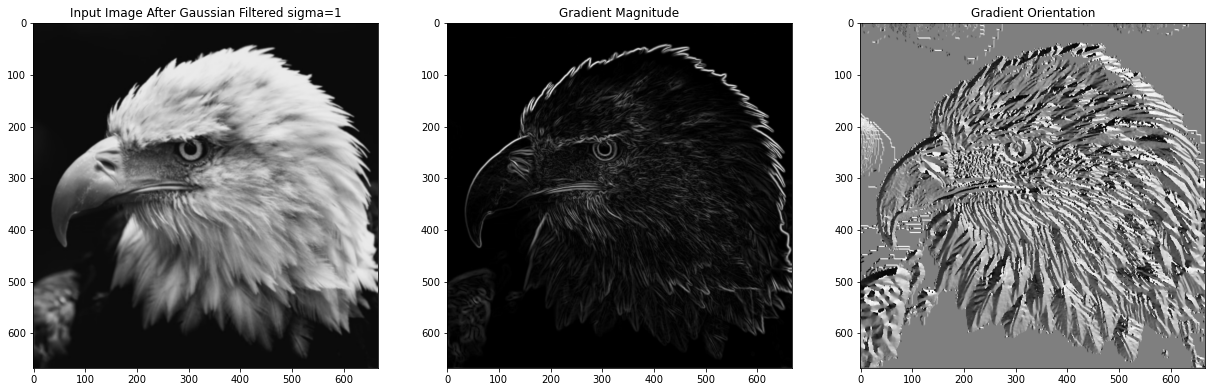

In [91]:
img = cv2.imread('img/example_02.jpg', cv2.IMREAD_GRAYSCALE)
# Gaussian filtering: sigma=1
img = cv2.GaussianBlur(img, (7,7),1)
gradX, gradY = image_process.gradient(image_process.boundary_process(img, 1, 'same', 'reflect'))
magnitude = np.sqrt(gradX[:, :]**2 + gradY[:, :]**2)
theta = np.arctan2(gradY[:, :], gradX[:, :])
plt.figure(figsize=(21,7))
plt.subplot(131)
utils.show_img(img)
plt.title('Input Image After Gaussian Filtered sigma=1')
plt.subplot(132)
utils.show_img(utils.normalize(magnitude))
plt.title('Gradient Magnitude')
plt.subplot(133)
utils.show_img(utils.normalize(theta))
plt.title('Gradient Orientation')

Text(0.5, 1.0, 'Gradient Orientation')

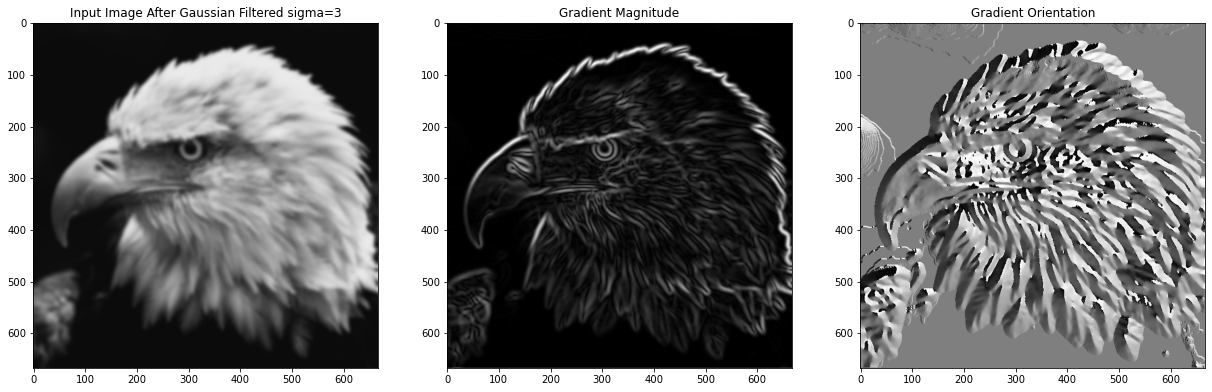

In [96]:
img = cv2.imread('img/example_02.jpg', cv2.IMREAD_GRAYSCALE)
# Gaussian filtering: sigma=3
img = cv2.GaussianBlur(img, (19,19),3)
gradX, gradY = image_process.gradient(image_process.boundary_process(img, 1, 'same', 'reflect'))
magnitude = np.sqrt(gradX[:, :]**2 + gradY[:, :]**2)
theta = np.arctan2(gradY[:, :], gradX[:, :])
plt.figure(figsize=(21,7))
plt.subplot(131)
utils.show_img(img)
plt.title('Input Image After Gaussian Filtered sigma=3')
plt.subplot(132)
utils.show_img(utils.normalize(magnitude))
plt.title('Gradient Magnitude')
plt.subplot(133)
utils.show_img(utils.normalize(theta))
plt.title('Gradient Orientation')

Text(0.5, 1.0, 'Gradient Orientation')

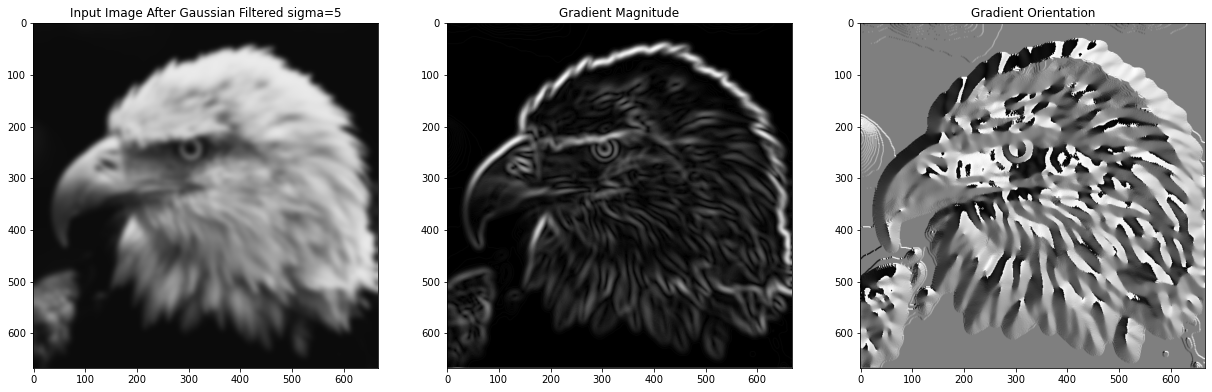

In [97]:
img = cv2.imread('img/example_02.jpg', cv2.IMREAD_GRAYSCALE)
# Gaussian filtering: sigma=5
img = cv2.GaussianBlur(img, (31,31),5)
gradX, gradY = image_process.gradient(image_process.boundary_process(img, 1, 'same', 'reflect'))
magnitude = np.sqrt(gradX[:, :]**2 + gradY[:, :]**2)
theta = np.arctan2(gradY[:, :], gradX[:, :])
plt.figure(figsize=(21,7))
plt.subplot(131)
utils.show_img(img)
plt.title('Input Image After Gaussian Filtered sigma=5')
plt.subplot(132)
utils.show_img(utils.normalize(magnitude))
plt.title('Gradient Magnitude')
plt.subplot(133)
utils.show_img(utils.normalize(theta))
plt.title('Gradient Orientation')

从上面的三组图片可以看出，$\sigma$越大，原图像越模糊，梯度幅值图的线条越粗，梯度相位图也越模糊。

## 2.2 Canny边缘检测

### 2.2.1 梯度图

Text(0.5, 1.0, 'Gradient Orientation')

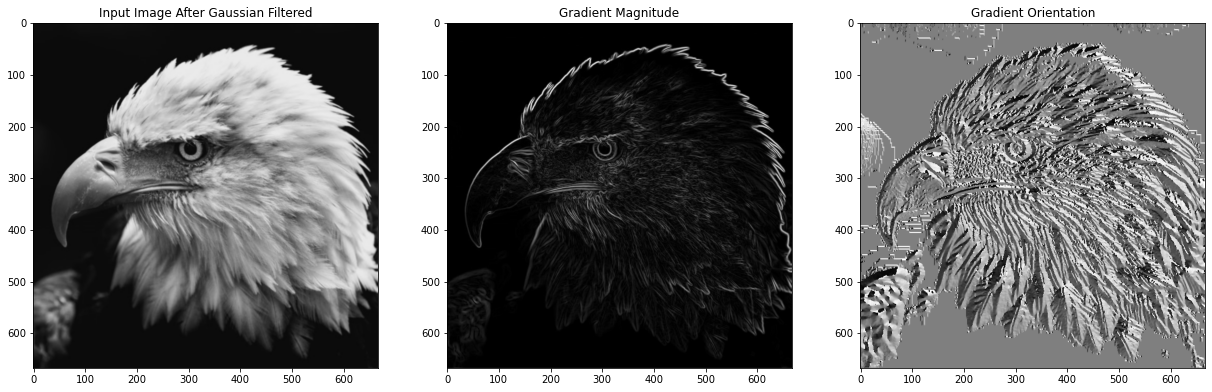

In [98]:
img = cv2.imread('img/example_02.jpg', cv2.IMREAD_GRAYSCALE)
# filtered
img = cv2.GaussianBlur(img, ksize=(3,3),sigmaX=1, sigmaY=1)
gradX, gradY = image_process.gradient(image_process.boundary_process(img, 1, 'same', 'reflect'))
magnitude = np.sqrt(gradX[:, :]**2 + gradY[:, :]**2)
theta = np.arctan2(gradY[:, :], gradX[:, :])
plt.figure(figsize=(21,7))
plt.subplot(131)
utils.show_img(img)
plt.title('Input Image After Gaussian Filtered')
plt.subplot(132)
utils.show_img(utils.normalize(magnitude))
plt.title('Gradient Magnitude')
plt.subplot(133)
utils.show_img(utils.normalize(theta))
plt.title('Gradient Orientation')

Text(0.5, 1.0, 'High Threshold')

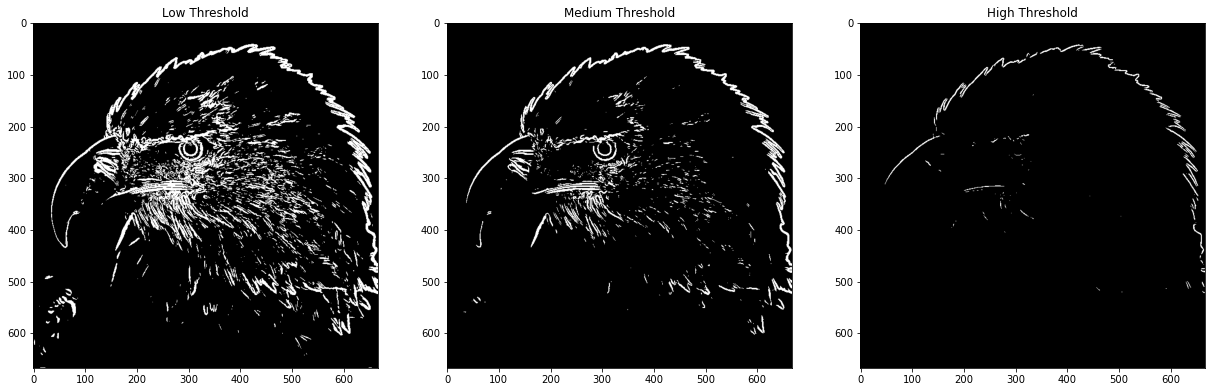

In [99]:
magnitude_img = utils.normalize(magnitude)
plt.figure(figsize=(21,7))
plt.subplot(131)
utils.show_img(image_process.thresholding_filter(magnitude_img, 30))
plt.title('Low Threshold')
plt.subplot(132)
utils.show_img(image_process.thresholding_filter(magnitude_img, 50))
plt.title('Medium Threshold')
plt.subplot(133)
utils.show_img(image_process.thresholding_filter(magnitude_img, 120))
plt.title('High Threshold')

### 2.2.2 非极大值抑制

Text(0.5, 1.0, 'Gradient Magnitude After NMS')

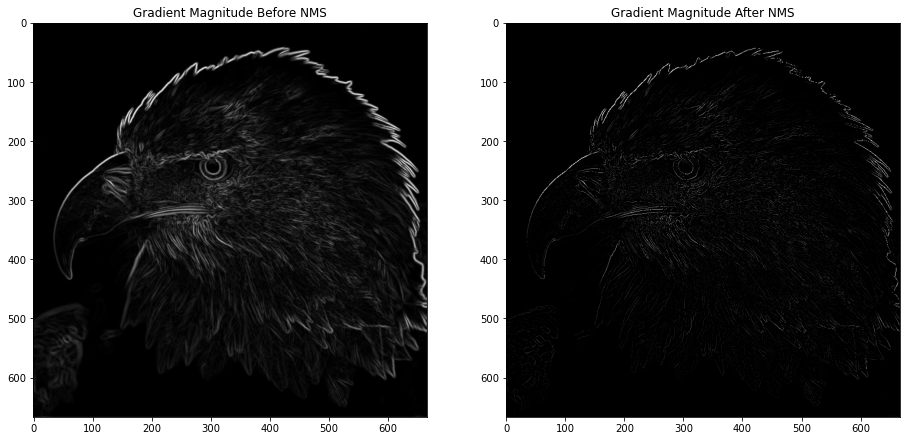

In [100]:
gradX = cv2.Sobel(img, ddepth=cv2.CV_64F, dx=1, dy=0)
gradY = cv2.Sobel(img, ddepth=cv2.CV_64F, dx=0, dy=1)
nms_magnitude = image_process.nms(gradX, gradY)
plt.figure(figsize=(24,12))
plt.subplot(131)
utils.show_img(utils.normalize(magnitude))
plt.title('Gradient Magnitude Before NMS')
plt.subplot(132)
utils.show_img(utils.normalize(nms_magnitude))
plt.title('Gradient Magnitude After NMS')

### 2.2.3 边缘连接

Text(0.5, 1.0, 'High Threshold')

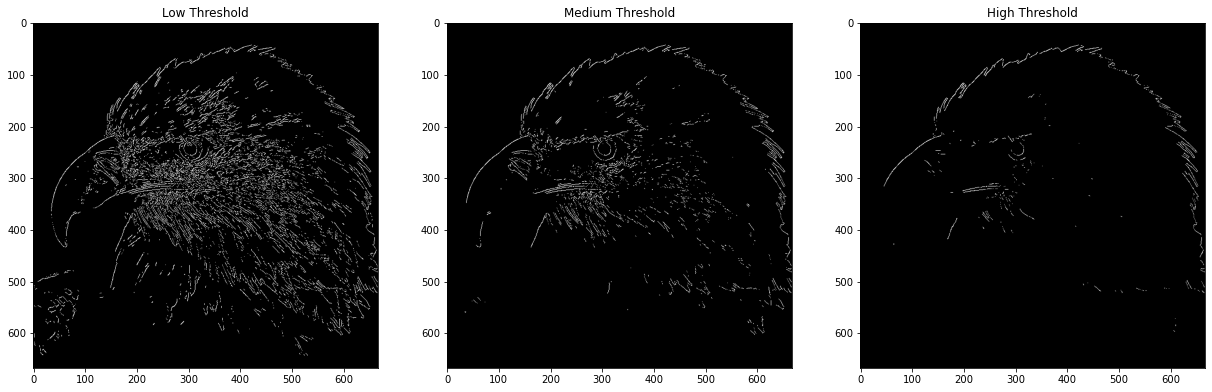

In [101]:
magnitude_img = utils.normalize(nms_magnitude)
plt.figure(figsize=(21,7))
plt.subplot(131)
utils.show_img(image_process.thresholding_filter(magnitude_img, 25))
plt.title('Low Threshold')
plt.subplot(132)
utils.show_img(image_process.thresholding_filter(magnitude_img, 50))
plt.title('Medium Threshold')
plt.subplot(133)
utils.show_img(image_process.thresholding_filter(magnitude_img, 100))
plt.title('High Threshold')

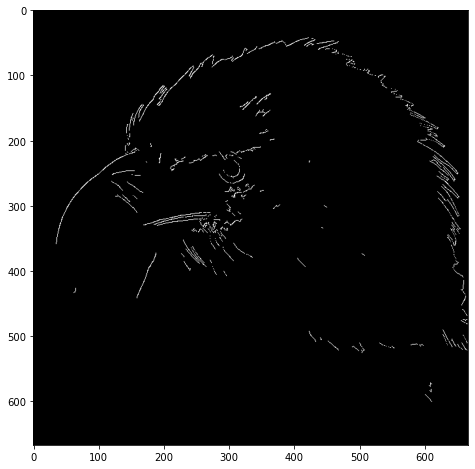

In [102]:
canny_result = image_process.hysteresis_thresholding(magnitude_img, 25, 100)
plt.figure(figsize=(8,8))
utils.show_img(canny_result)

## 2.3 Harris角点检测

### 2.3.1 检测步骤

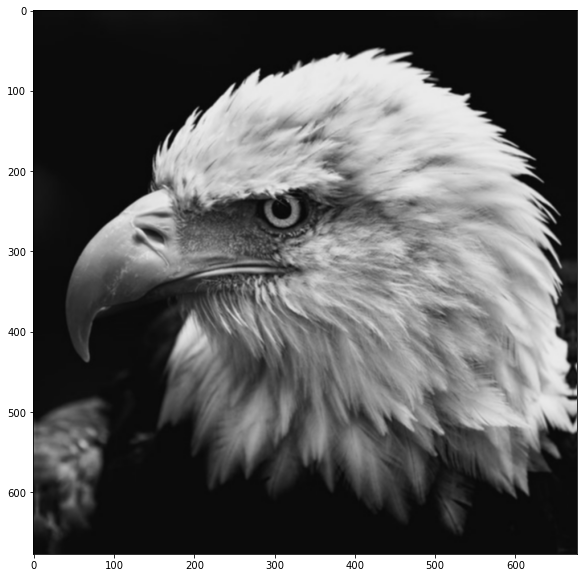

In [13]:
img = cv2.imread('img/example_02.jpg', cv2.IMREAD_GRAYSCALE)
img = image_process.separable_gaussian_filter(image_process.boundary_process(img, 6, 'same', 'reflect'), 1, 1)
plt.figure(figsize=(10,10))
utils.show_img(img)

In [14]:
# 窗口大小：7×7
smm_map = image_process.compute_second_moment_matrix(img, 3, 1)
alpha = 0.05
height = img.shape[0]
width = img.shape[1]
har = np.zeros((height, width))
for m in range(0, height):
    for n in range(0, width):
        har[m][n] = np.linalg.det(smm_map[m][n])-alpha*np.trace(smm_map[m][n])*np.trace(smm_map[m][n])

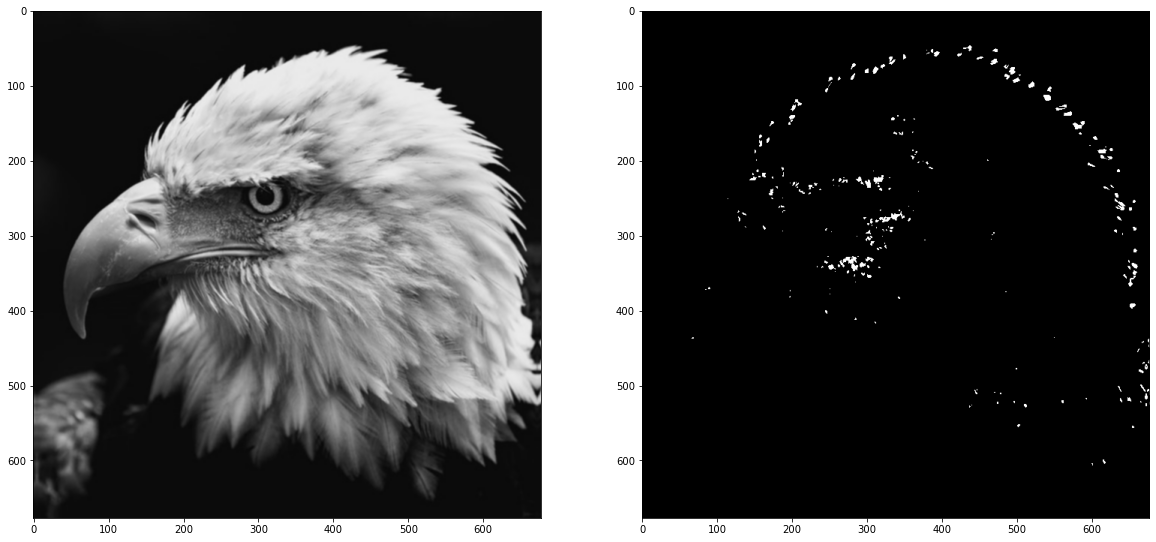

In [15]:
plt.figure(figsize=(20,10))
plt.subplot(121)
utils.show_img(img)
plt.subplot(122)
utils.show_img(image_process.thresholding_filter(har, 40000000))

Text(0.5, 1.0, 'Corners')

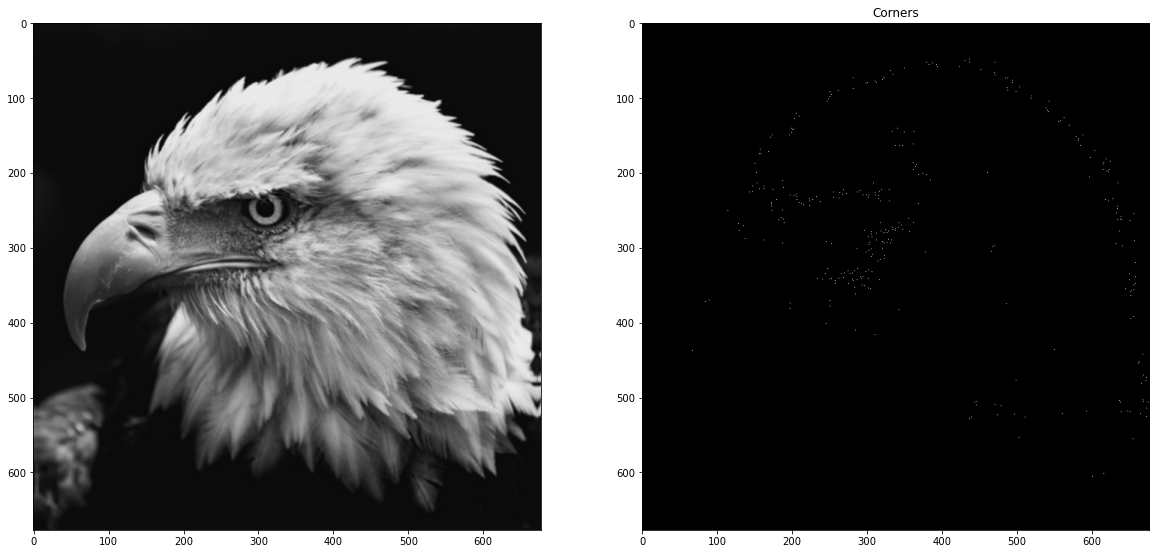

In [16]:
nms_img = image_process.nms_2d(har, 40000000)
plt.figure(figsize=(20,10))
plt.subplot(121)
utils.show_img(img)
plt.subplot(122)
utils.show_img(nms_img)
plt.title('Corners')

### 2.3.2 检测窗口的大小

Text(0.5, 1.0, 'window size: 101×101')

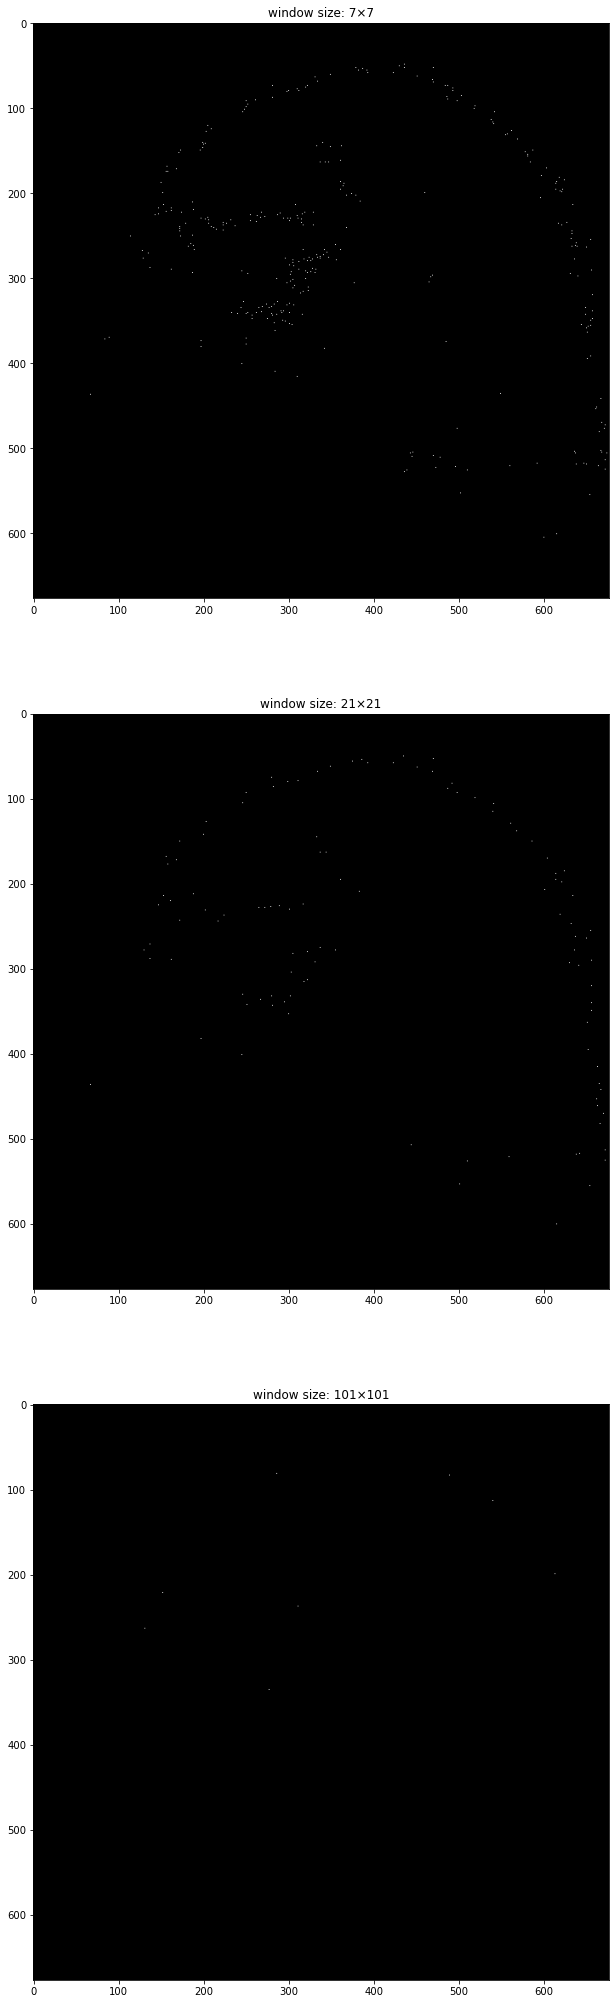

In [18]:
plt.figure(figsize=(12,36))
# 窗口大小：7×7
smm_map = image_process.compute_second_moment_matrix(img, 3, 1)
alpha = 0.05
height = img.shape[0]
width = img.shape[1]
har = np.zeros((height, width))
for m in range(0, height):
    for n in range(0, width):
        har[m][n] = np.linalg.det(smm_map[m][n])-alpha*np.trace(smm_map[m][n])*np.trace(smm_map[m][n])
nms_img = image_process.nms_2d(har, 40000000)
plt.subplot(311)
utils.show_img(nms_img)
plt.title("window size: 7×7")
# 窗口大小：21×21
smm_map = image_process.compute_second_moment_matrix(img, 10, 3)
alpha = 0.05
height = img.shape[0]
width = img.shape[1]
har = np.zeros((height, width))
for m in range(0, height):
    for n in range(0, width):
        har[m][n] = np.linalg.det(smm_map[m][n])-alpha*np.trace(smm_map[m][n])*np.trace(smm_map[m][n])
nms_img = image_process.nms_2d(har, 40000000)
plt.subplot(312)
utils.show_img(nms_img)
plt.title("window size: 21×21")
# 窗口大小：101×101
smm_map = image_process.compute_second_moment_matrix(img, 50, 16)
alpha = 0.05
height = img.shape[0]
width = img.shape[1]
har = np.zeros((height, width))
for m in range(0, height):
    for n in range(0, width):
        har[m][n] = np.linalg.det(smm_map[m][n])-alpha*np.trace(smm_map[m][n])*np.trace(smm_map[m][n])
nms_img = image_process.nms_2d(har, 40000000)
plt.subplot(313)
utils.show_img(nms_img)
plt.title("window size: 101×101")

分别选取不同的窗口大小(7×7, 21×21, 101×101)进行Harris角点检测，对比以上三张图片，我们可以发现窗口的大小与角点检测有密切的关系，当窗口逐渐变大时，一些微小的角点将被忽略，只能检测到较大的角点。

### 2.3.3 角点检测的不变性，等变性和定位精度

光度测量学的变换对角点检测的影响：对图片光强统一加减具有不变性，但对于光强缩放不具有不变性

Text(0.5, 1.0, 'Corners')

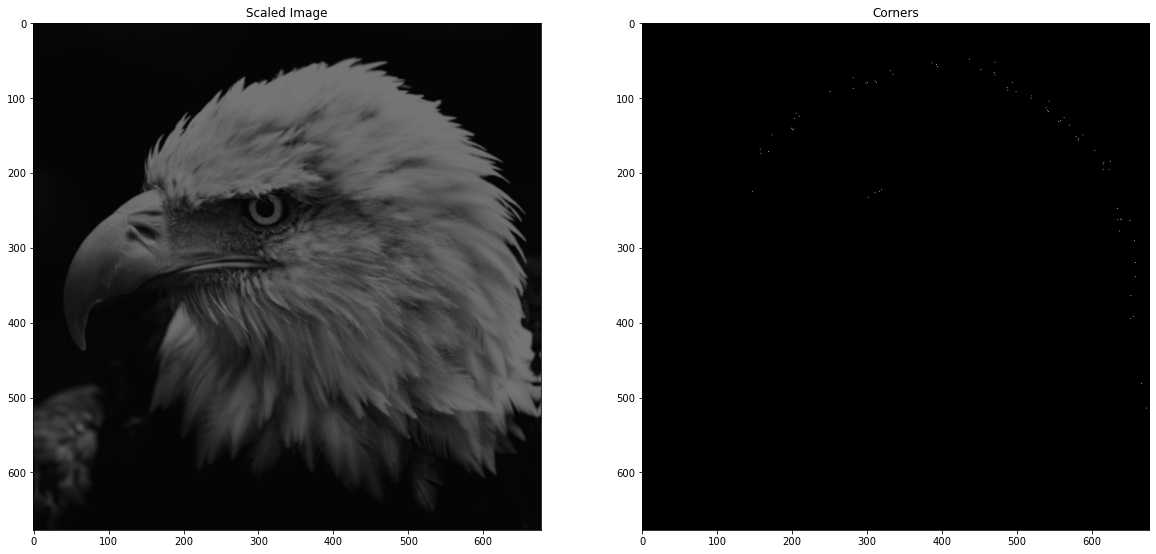

In [22]:
# 统一缩小图片的灰度值，观察其对角点检测的影响
height = img.shape[0]
width = img.shape[1]
img_scaled = np.zeros((height, width))
for m in range(0, height):
    for n in range(0, width):
        img_scaled[m][n] = img[m][n]//2
img_scaled = np.uint8(img_scaled)
# 窗口大小：7×7
smm_map = image_process.compute_second_moment_matrix(img_scaled, 3, 1)
alpha = 0.05
har = np.zeros((height, width))
for m in range(0, height):
    for n in range(0, width):
        har[m][n] = np.linalg.det(smm_map[m][n])-alpha*np.trace(smm_map[m][n])*np.trace(smm_map[m][n])        
nms_img = image_process.nms_2d(har, 40000000)
plt.figure(figsize=(20,10))
plt.subplot(121)
utils.show_img(img_scaled)
plt.title('Scaled Image')
plt.subplot(122)
utils.show_img(nms_img)
plt.title('Corners')

从上图中我们可以发现，当统一缩小图像灰度值时，检测出的角点数目明显变少，所以不具有不变性。

图像几何变换对角点检测的影响：大多数都具有不变性，等变性，不影响定位精度，但是尺度变换不具有不变性。

Text(0.5, 1.0, 'Corners')

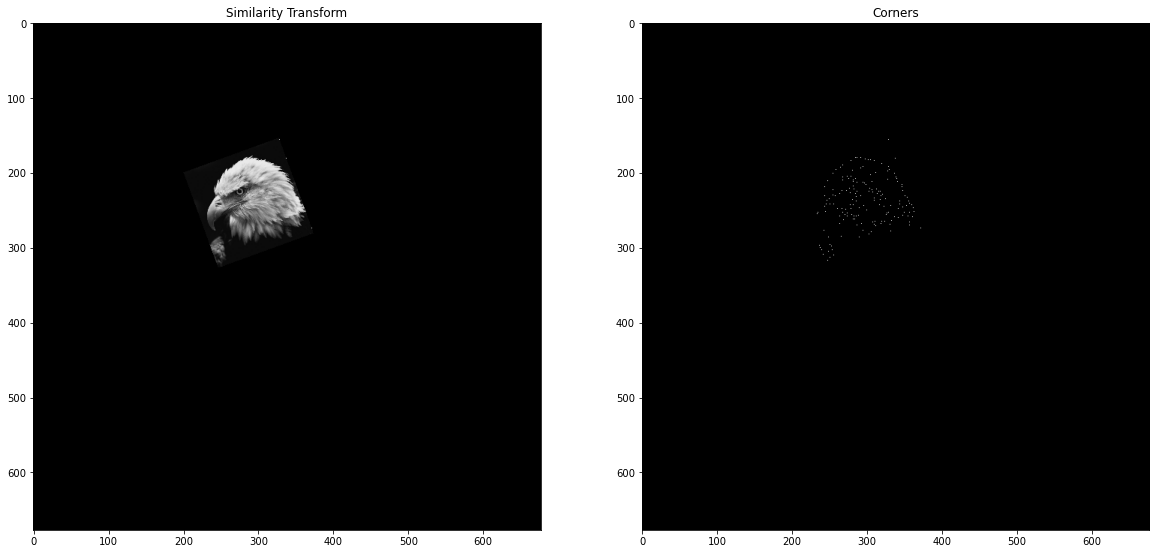

In [24]:
# 相似变换
kernel = image_process.get_similarity_kernel(200, 200, 20, 0.2)
img_transformed = image_process.inverse_warping(img, kernel)

# 窗口大小：7×7
smm_map = image_process.compute_second_moment_matrix(img_transformed, 3, 1)
alpha = 0.05
har = np.zeros((height, width))
for m in range(0, height):
    for n in range(0, width):
        har[m][n] = np.linalg.det(smm_map[m][n])-alpha*np.trace(smm_map[m][n])*np.trace(smm_map[m][n])        
nms_img = image_process.nms_2d(har, 40000000)
plt.figure(figsize=(20,10))
plt.subplot(121)
utils.show_img(img_transformed)
plt.title('Similarity Transform')
plt.subplot(122)
utils.show_img(nms_img)
plt.title('Corners')

从上图中可以看出，当图像缩小时，检测到的角点数目变少了，因此不具有不变性。